In [1]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.decomposition import PCA

from ae import AE

Loading model.

In [2]:
ae2, ae10 = AE(device='cpu', latent_dim=2), AE(device='cpu', latent_dim=10)

In [4]:
model2 = torch.load('best_models/autoencoder_ld2_all.pth', map_location=torch.device('cpu'), weights_only=True)
model10 = torch.load('best_models/autoencoder_ld10_all.pth', map_location=torch.device('cpu'), weights_only=True)

ae2.load_state_dict(model2)
ae10.load_state_dict(model10)

<All keys matched successfully>

## Learning Curves

Plotting learning curves.

In [5]:
loss2 = np.load('best_models/loss_autoencoder_ld2_all.npy')
loss10 = np.load('best_models/loss_autoencoder_ld10_all.npy')

epochs2 = [i for i in range(loss2.shape[0])]
epochs10 = [i for i in range(loss10.shape[0])]

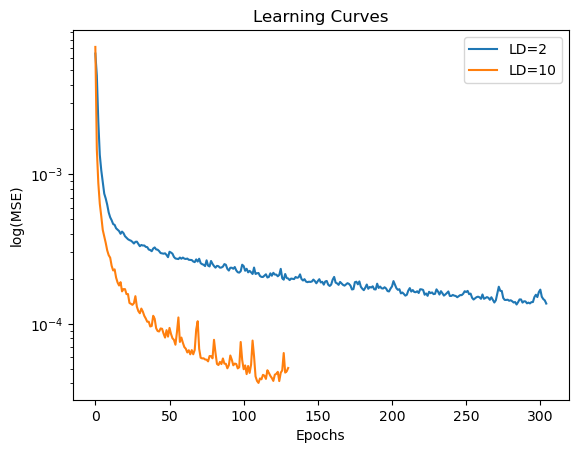

In [6]:
plt.plot(epochs2, loss2, label='LD=2')
plt.plot(epochs10, loss10, label='LD=10')

plt.yscale('log')
plt.ylabel('log(MSE)')
plt.xlabel('Epochs')
plt.title('Learning Curves')
plt.legend()
plt.show()

## Model avaliation

Loading data.

In [9]:
data_auau = np.load('tipAu_Au_morl.npz')['wavelets']
data_ausio2 = np.load('tipAu_SiO2_morl.npz')['wavelets']
data_ligcl = np.load('tipLig_CL_morl.npz')['wavelets']
data_ligsio2 = np.load('tipLig_SiO2_morl.npz')['wavelets']

data_auau = torch.tensor(data_auau, dtype=torch.float32).unsqueeze(1)
data_ausio2 = torch.tensor(data_ausio2, dtype=torch.float32).unsqueeze(1)
data_ligcl = torch.tensor(data_ligcl, dtype=torch.float32).unsqueeze(1)
data_ligsio2 = torch.tensor(data_ligsio2, dtype=torch.float32).unsqueeze(1)

data_ausio2 /= data_ausio2.max()
data_auau /= data_auau.max()
data_ligcl /= data_ligcl.max()
data_ligsio2 /= data_ligsio2.max()

data = torch.concatenate([data_auau, data_ausio2, data_ligcl, data_ligsio2])

Testing.

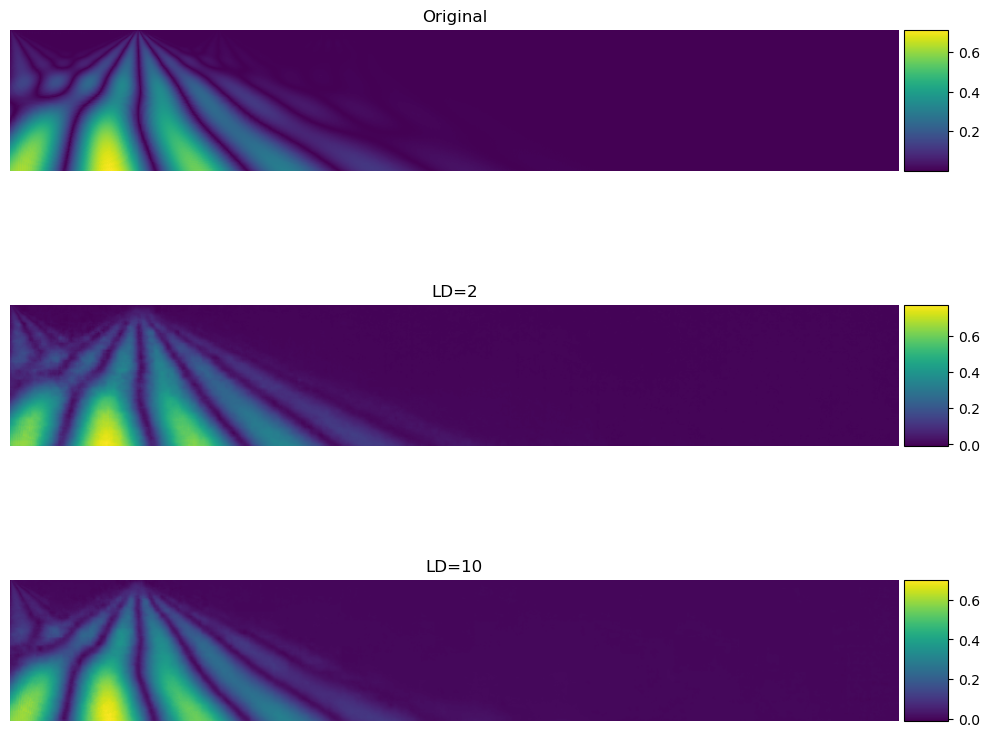

In [10]:
wave0 = data[0]

with torch.no_grad():
    wave0_pred2 = ae2(wave0.unsqueeze(0))
    wave0_pred10 = ae10(wave0.unsqueeze(0))

fig, ax = plt.subplots(3, 1, figsize=(10, 9))

im0 = ax[0].imshow(wave0.squeeze())
ax[0].axis('off')
ax[0].set_title('Original')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)

im1 = ax[1].imshow(wave0_pred2.squeeze())
ax[1].axis('off')
ax[1].set_title('LD=2')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax)

im1 = ax[2].imshow(wave0_pred10.squeeze())
ax[2].axis('off')
ax[2].set_title('LD=10')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax)

plt.tight_layout()
plt.show()

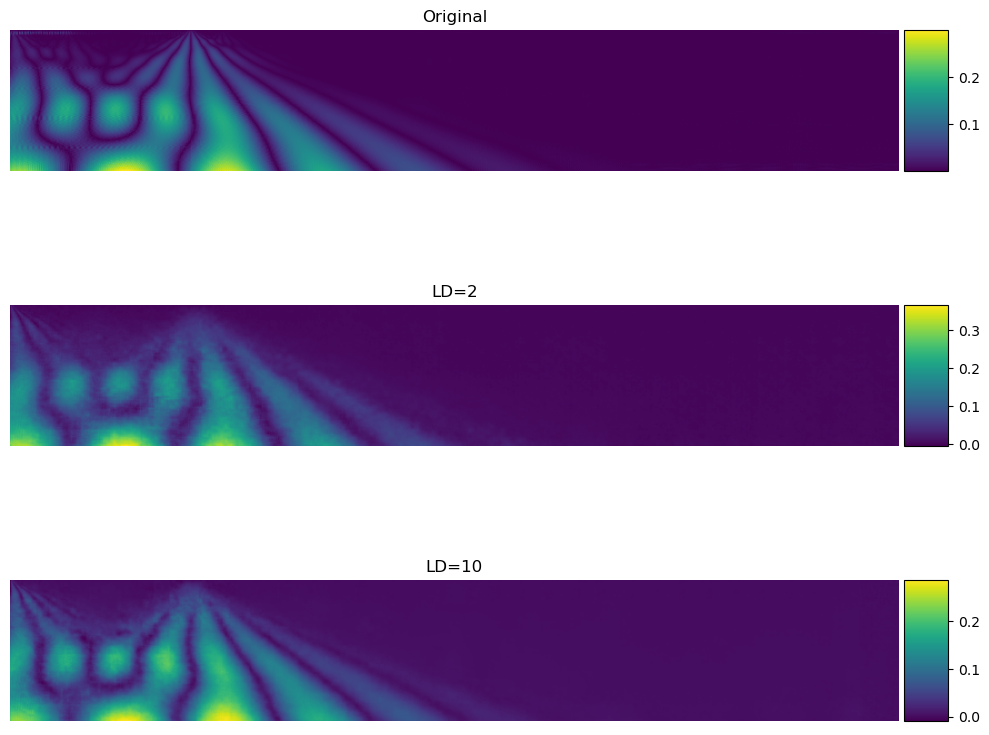

In [11]:
wave15 = data[15]

with torch.no_grad():
    wave15_pred2 = ae2(wave15.unsqueeze(0))
    wave15_pred10 = ae10(wave15.unsqueeze(0))

fig, ax = plt.subplots(3, 1, figsize=(10, 9))

im0 = ax[0].imshow(wave15.squeeze())
ax[0].axis('off')
ax[0].set_title('Original')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)

im1 = ax[1].imshow(wave15_pred2.squeeze())
ax[1].axis('off')
ax[1].set_title('LD=2')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax)

im1 = ax[2].imshow(wave15_pred10.squeeze())
ax[2].axis('off')
ax[2].set_title('LD=10')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax)

plt.tight_layout()
plt.show()